# 🫀 **Predicting Heart Disease**

The World Health Organization (WHO) estimates that 17.9 million people die from cardiovascular diseases (CVDs) every year.

There are multiple risk factors that could contribute to CVD in an individual, such as unhealthy diet, lack of physical activity, or mental illness. Identifying these risk factors early on could help prevent many premature deaths.

We are working for an R&D company that focuses on providing healthcare solutions. The company has collected anonymized data from multiple hospitals on several patients. The dataset includes relevant information for each patient, such as their personal information and some medical data, including whether or not they have had heart disease before.

**We are tasked with using the dataset to accurately predict the likelihood of a new patient having heart disease in the future.**

**LIBRARIES**

In [284]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split 
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import GridSearchCV


**CSV**

In [285]:
heart_df=pd.read_csv("heart.csv")
heart_df.head()
print("Number of features:",len(heart_df.columns))
print("Number of observations:",len(heart_df))

Number of features: 12
Number of observations: 918


## **EDA: Descriptive Statistics**

In [286]:
heart_df.dtypes


missing_values = heart_df.isnull().sum()
missing_values

heart_df.describe()


,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.396514,198.799564,0.233115,136.809368,0.887364,0.553377
std,9.432617,18.514154,109.384145,0.423046,25.460334,1.066570,0.497414
min,28.000000,0.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,173.250000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


 ### **Box Plot of Age**

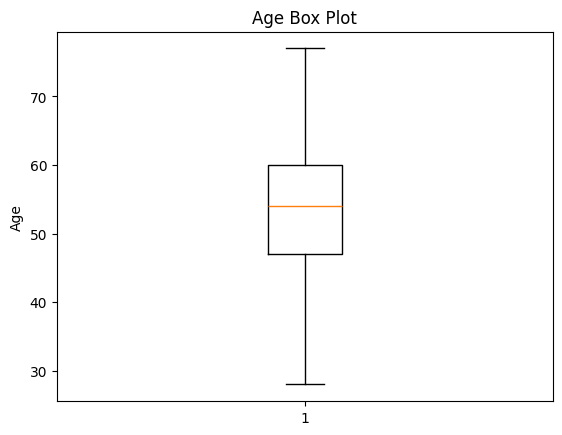

In [287]:
# Generar datos de ejemplo
np.random.seed(10)
data = heart_df["Age"]

# Crear el box plot
plt.boxplot(data)

# Añadir título y etiquetas
plt.title("Age Box Plot")
plt.ylabel("Age")

# Mostrar el gráfico
plt.show()


### **Histogram of Cholesterol** 

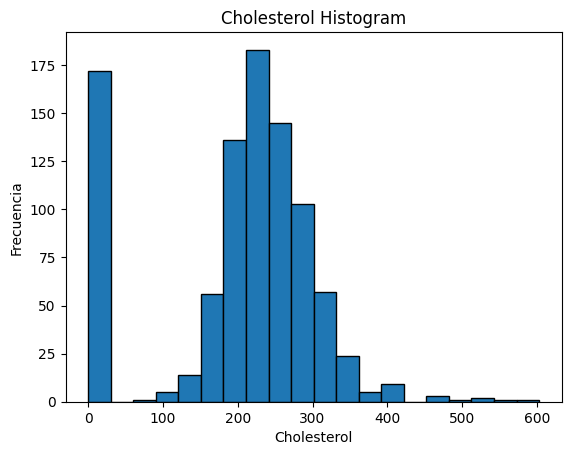

In [288]:
# Crear el histograma
plt.hist(heart_df["Cholesterol"], bins=20, edgecolor='black')

# Añadir título y etiquetas
plt.title("Cholesterol Histogram")
plt.xlabel("Cholesterol")
plt.ylabel("Frecuencia")

# Mostrar el gráfico
plt.show()

- The average age of patients is ~53 years.

- The median for Cholesterol is higher than its mean by roughly 25 mm/dl, indicating that it could be a left-skewed distribution with a possibility of outliers skewing the distribution.

- RestingBP and Cholesterol have a minimum value of zero.

- There don't seem to be any missing values in these columns.

## **EDA: Visualizations**

### **Frequencies of Qualitative Variables**

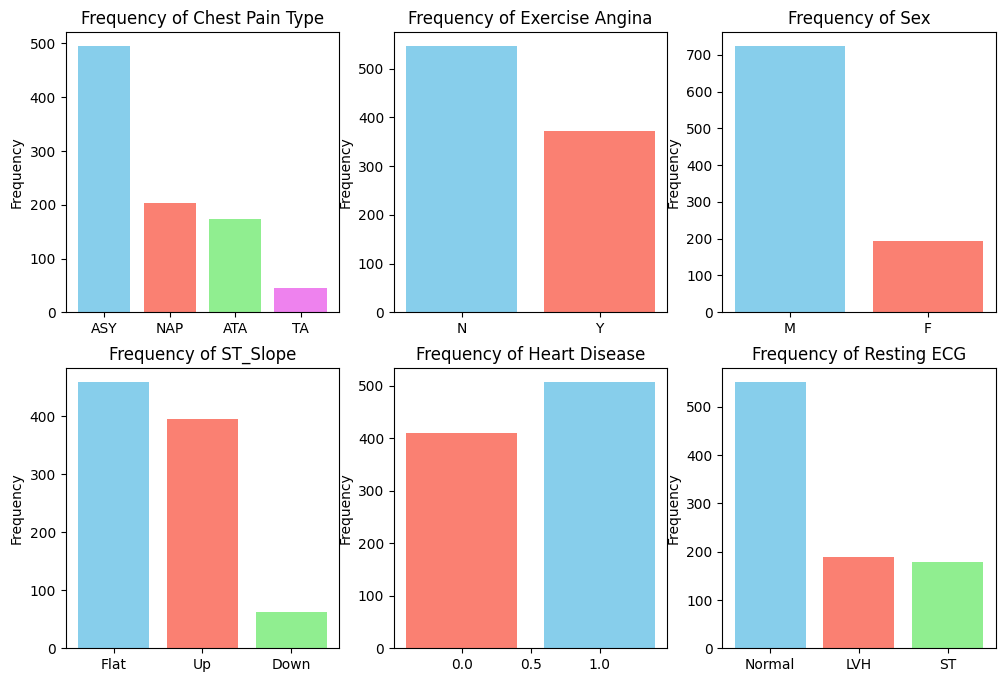

In [289]:
# Crear un lienzo con una cuadrícula de 3x3
fig, axes = plt.subplots(2, 3, figsize=(12, 8))

colors = ['skyblue', 'salmon',"lightgreen","violet"]


# Frecuencia de 'ChestPainType'
frecuency_ChestPainType = heart_df['ChestPainType'].value_counts()
axes[0, 0].bar(frecuency_ChestPainType.index, frecuency_ChestPainType.values, color=colors, width=0.8)
axes[0, 0].set_title('Frequency of Chest Pain Type')
axes[0, 0].set_ylabel('Frequency')

# Frecuencia de 'ExerciseAngina'
frecuency_ExerciseAngina = heart_df['ExerciseAngina'].value_counts()
axes[0, 1].bar(frecuency_ExerciseAngina.index, frecuency_ExerciseAngina.values, color=colors,width=0.8)
axes[0, 1].set_title('Frequency of Exercise Angina')
axes[0, 1].set_ylabel('Frequency')

# Frecuencia de 'Sex'
frecuency_Sex = heart_df['Sex'].value_counts()
axes[0, 2].bar(frecuency_Sex.index, frecuency_Sex.values, color=colors, width=0.8)
axes[0, 2].set_title('Frequency of Sex')
axes[0, 2].set_ylabel('Frequency')

# Frecuencia de 'ST_Slope'
frecuency_ST_Slope = heart_df['ST_Slope'].value_counts()
axes[1, 0].bar(frecuency_ST_Slope.index, frecuency_ST_Slope.values, color=colors, width=0.8)
axes[1, 0].set_title('Frequency of ST_Slope')
axes[1, 0].set_ylabel('Frequency')

# Frecuencia de 'HeartDisease'
frecuency_heart_disease = heart_df['HeartDisease'].value_counts()
axes[1, 1].bar(frecuency_heart_disease.index, frecuency_heart_disease.values, color=colors, width=0.8)
axes[1, 1].set_title('Frequency of Heart Disease')
axes[1, 1].set_ylabel('Frequency')

# Frecuencia de 'HeartDisease'
frecuency_heart_RestingECG = heart_df['RestingECG'].value_counts()
axes[1, 2].bar(frecuency_heart_RestingECG.index, frecuency_heart_RestingECG.values, color=colors, width=0.8)
axes[1, 2].set_title('Frequency of Resting ECG')
axes[1, 2].set_ylabel('Frequency')

# Mostrar los gráficos
plt.show()

### **Grouping by Heart Disease and Qualitative Variables**

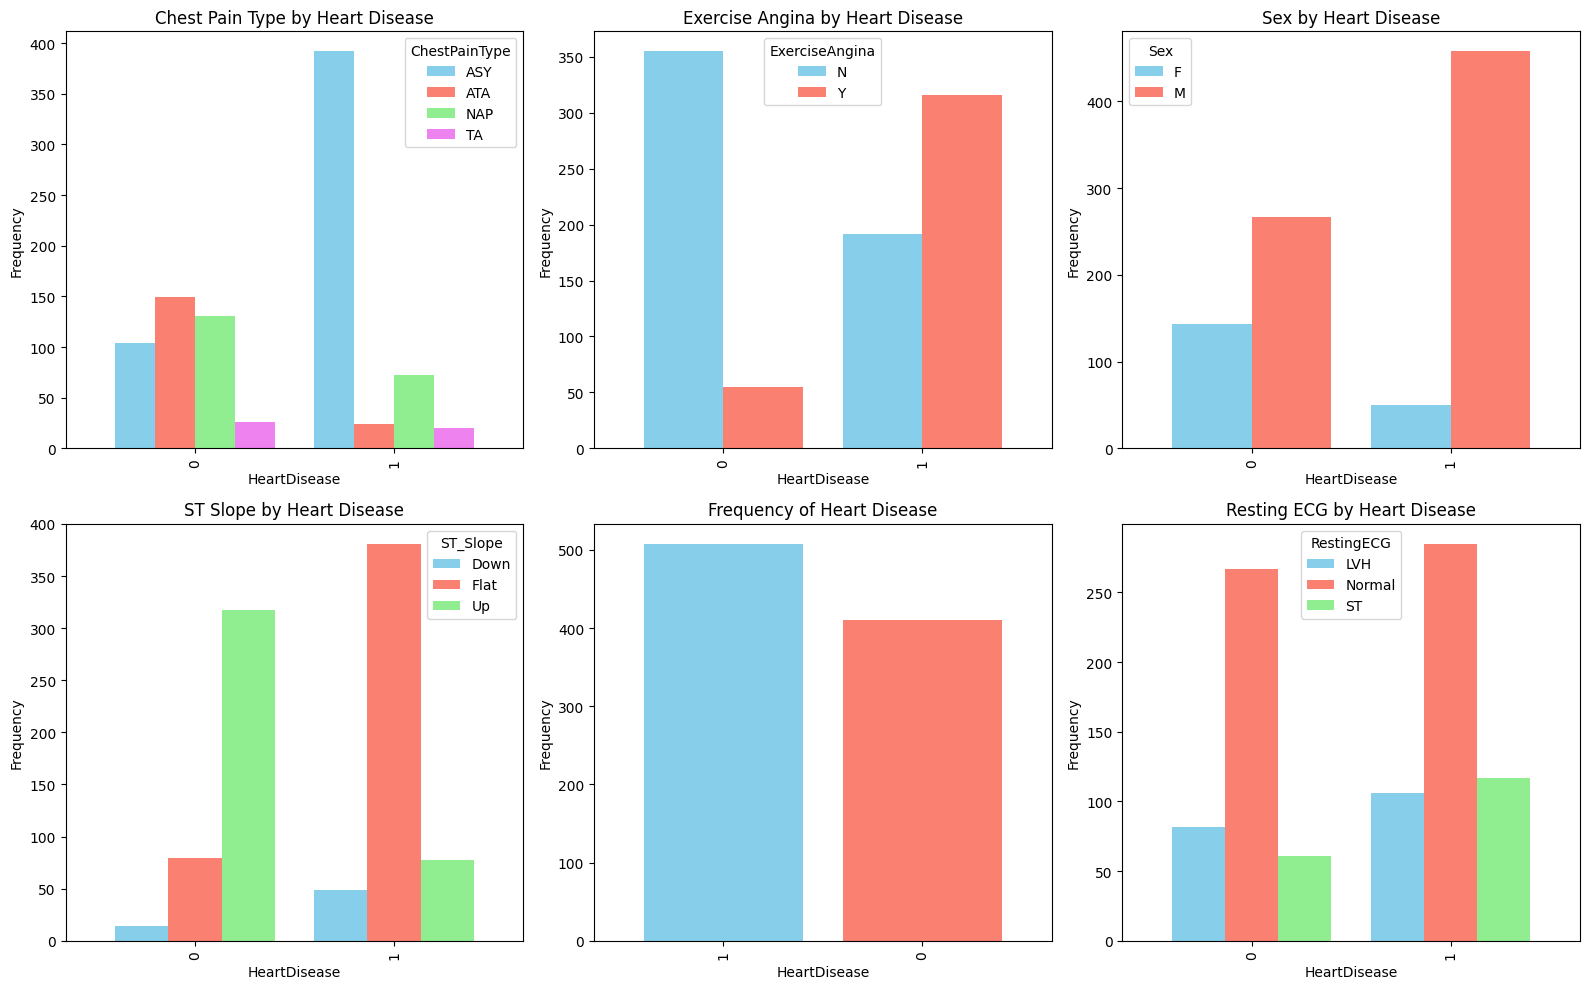

In [290]:

# Crear un lienzo con una cuadrícula de 2x3
fig, axes = plt.subplots(2, 3, figsize=(16, 10))

# Colores para las diferentes categorías de 'HeartDisease'
colors = ['skyblue', 'salmon',"lightgreen","violet"]

# Gráfico para 'ChestPainType' agrupado por 'HeartDisease'
chest_pain_counts = heart_df.groupby('HeartDisease')['ChestPainType'].value_counts().unstack()
chest_pain_counts.plot(kind='bar', ax=axes[0, 0], color=colors, width=0.8)
axes[0, 0].set_title('Chest Pain Type by Heart Disease')
axes[0, 0].set_ylabel('Frequency')

# Gráfico para 'ExerciseAngina' agrupado por 'HeartDisease'
exercise_angina_counts = heart_df.groupby('HeartDisease')['ExerciseAngina'].value_counts().unstack()
exercise_angina_counts.plot(kind='bar', ax=axes[0, 1], color=colors, width=0.8)
axes[0, 1].set_title('Exercise Angina by Heart Disease')
axes[0, 1].set_ylabel('Frequency')

# Gráfico para 'Sex' agrupado por 'HeartDisease'
sex_counts = heart_df.groupby('HeartDisease')['Sex'].value_counts().unstack()
sex_counts.plot(kind='bar', ax=axes[0, 2], color=colors, width=0.8)
axes[0, 2].set_title('Sex by Heart Disease')
axes[0, 2].set_ylabel('Frequency')

# Gráfico para 'ST_Slope' agrupado por 'HeartDisease'
st_slope_counts = heart_df.groupby('HeartDisease')['ST_Slope'].value_counts().unstack()
st_slope_counts.plot(kind='bar', ax=axes[1, 0], color=colors, width=0.8)
axes[1, 0].set_title('ST Slope by Heart Disease')
axes[1, 0].set_ylabel('Frequency')

# Gráfico para 'HeartDisease' agrupado por sí mismo (frecuencia de enfermedad cardíaca)
heart_disease_counts = heart_df['HeartDisease'].value_counts()
heart_disease_counts.plot(kind='bar', ax=axes[1, 1], color=colors, width=0.8)
axes[1, 1].set_title('Frequency of Heart Disease')
axes[1, 1].set_ylabel('Frequency')

# Gráfico para 'RestingECG' agrupado por 'HeartDisease'
resting_ecg_counts = heart_df.groupby('HeartDisease')['RestingECG'].value_counts().unstack()
resting_ecg_counts.plot(kind='bar', ax=axes[1, 2], color=colors, width=0.8)
axes[1, 2].set_title('Resting ECG by Heart Disease')
axes[1, 2].set_ylabel('Frequency')

# Ajustar el layout para que no se solapen los gráficos
plt.tight_layout()

# Mostrar los gráficos
plt.show()


### **Grouping by Age and Qualitative Variables**

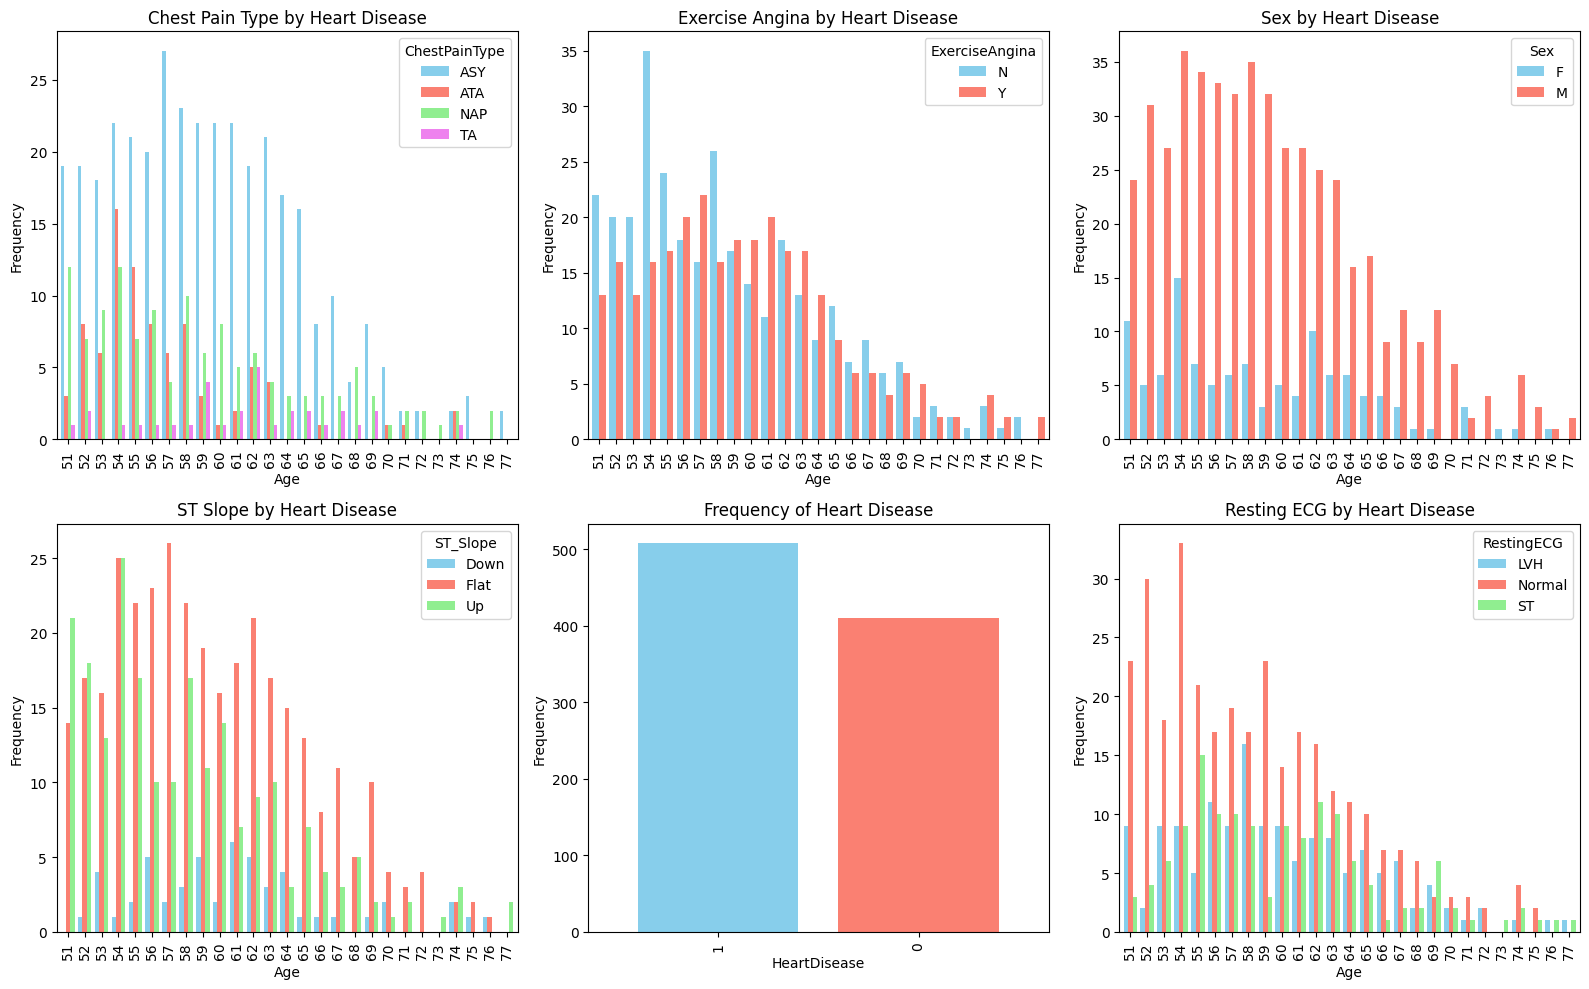

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
293,65,M,ASY,115,0,0,Normal,93,Y,0.0,Flat,1
294,32,M,TA,95,0,1,Normal,127,N,0.7,Up,1
295,61,M,ASY,105,0,1,Normal,110,Y,1.5,Up,1
296,50,M,ASY,145,0,1,Normal,139,Y,0.7,Flat,1
297,57,M,ASY,110,0,1,ST,131,Y,1.4,Up,1
...,...,...,...,...,...,...,...,...,...,...,...,...
514,43,M,ASY,122,0,0,Normal,120,N,0.5,Up,1
515,63,M,NAP,130,0,1,ST,160,N,3.0,Flat,0
518,48,M,NAP,102,0,1,ST,110,Y,1.0,Down,1
535,56,M,ASY,130,0,0,LVH,122,Y,1.0,Flat,1


In [291]:

# Crear un lienzo con una cuadrícula de 2x3
fig, axes = plt.subplots(2, 3, figsize=(16, 10))

# Colores para las diferentes categorías de 'HeartDisease'
colors = ['skyblue', 'salmon',"lightgreen","violet"]

# Gráfico para 'ChestPainType' agrupado por 'HeartDisease'
chest_pain_counts = heart_df[heart_df['Age'] > 50].groupby('Age')['ChestPainType'].value_counts().unstack()
chest_pain_counts.plot(kind='bar', ax=axes[0, 0], color=colors, width=0.8)
axes[0, 0].set_title('Chest Pain Type by Heart Disease')
axes[0, 0].set_ylabel('Frequency')

# Gráfico para 'ExerciseAngina' agrupado por 'HeartDisease'
exercise_angina_counts = heart_df[heart_df['Age'] > 50].groupby('Age')['ExerciseAngina'].value_counts().unstack()
exercise_angina_counts.plot(kind='bar', ax=axes[0, 1], color=colors, width=0.8)
axes[0, 1].set_title('Exercise Angina by Heart Disease')
axes[0, 1].set_ylabel('Frequency')

# Gráfico para 'Sex' agrupado por 'HeartDisease'
sex_counts = heart_df[heart_df['Age'] > 50].groupby('Age')['Sex'].value_counts().unstack()
sex_counts.plot(kind='bar', ax=axes[0, 2], color=colors, width=0.8)
axes[0, 2].set_title('Sex by Heart Disease')
axes[0, 2].set_ylabel('Frequency')

# Gráfico para 'ST_Slope' agrupado por 'HeartDisease'
st_slope_counts = heart_df[heart_df['Age'] > 50].groupby('Age')['ST_Slope'].value_counts().unstack()
st_slope_counts.plot(kind='bar', ax=axes[1, 0], color=colors, width=0.8)
axes[1, 0].set_title('ST Slope by Heart Disease')
axes[1, 0].set_ylabel('Frequency')

# Gráfico para 'HeartDisease' agrupado por sí mismo (frecuencia de enfermedad cardíaca)
heart_disease_counts = heart_df['HeartDisease'].value_counts()
heart_disease_counts.plot(kind='bar', ax=axes[1, 1], color=colors, width=0.8)
axes[1, 1].set_title('Frequency of Heart Disease')
axes[1, 1].set_ylabel('Frequency')

# Gráfico para 'RestingECG' agrupado por 'HeartDisease'
resting_ecg_counts = heart_df[heart_df['Age'] > 50].groupby('Age')['RestingECG'].value_counts().unstack()
resting_ecg_counts.plot(kind='bar', ax=axes[1, 2], color=colors, width=0.8)
axes[1, 2].set_title('Resting ECG by Heart Disease')
axes[1, 2].set_ylabel('Frequency')

# Ajustar el layout para que no se solapen los gráficos
plt.tight_layout()

# Mostrar los gráficos
plt.show()

heart_df[heart_df["Cholesterol"]==0]

### **First Conclusions**

- The dataset is highly skewed towards male patients. 725 rows correspond to male patients, whereas only 193 correspond to female patients. This could potentially induce a bias in our model and impact predictions for any female patients in any unseen data.

- 410 patients were not diagnosed with heart disease, whereas 508 patients were. The target variable is somewhat evenly distributed, which is beneficial for training our model.

- A significant number of patients, 392, diagnosed with heart disease have asymptomatic (ASY) chest pain. While chest pain could be a relevant feature for our model, it's should be noted that asymptomatic implies that those patients who had heart disease did not have chest pain as a symptom.

- A high number (170) of patients with blood sugar greater than 120 mg/dl were diagnosed with heart disease in relation to those who were not.

## **Dataset Cleaning**

Before we move on to that, let's clean up the data. We identified that there are no missing values. However, as we noticed earlier, a couple of columns have 0 values that don't make sense.

In [292]:
count_zeros_RestingBP = (heart_df["RestingBP"] == 0).sum()
count_zeros_Cholesterol = (heart_df["Cholesterol"] == 0).sum()
count_zeros_Cholesterol

heart_df['Cholesterol'] = heart_df['Cholesterol'].replace(0, heart_df['Cholesterol'].median)
heart_df['RestingBP'] = heart_df['RestingBP'].replace(0, heart_df['RestingBP'].median)

## **Feature Selection**

Thanks to our EDA and a general understanding of the features, we can identify some of the features that we could start with:

- Age
- Sex
- ChestPainType
- Cholesterol
- FastingBS

In [293]:

heart_df=pd.get_dummies(data = heart_df,columns = ["Sex","ChestPainType","FastingBS","ST_Slope","RestingECG","ExerciseAngina"],drop_first = True)

heart_df['Sex_M'] = heart_df['Sex_M'].astype(int)
heart_df['ChestPainType_ATA'] = heart_df['ChestPainType_ATA'].astype(int)
heart_df['ChestPainType_NAP'] = heart_df['ChestPainType_NAP'].astype(int)
heart_df['ChestPainType_TA'] = heart_df['ChestPainType_TA'].astype(int)
heart_df['FastingBS_1'] = heart_df['FastingBS_1'].astype(int)
heart_df['ST_Slope_Flat'] = heart_df['ST_Slope_Flat'].astype(int)
heart_df['ST_Slope_Up'] = heart_df['ST_Slope_Up'].astype(int)
heart_df['RestingECG_Normal'] = heart_df['RestingECG_Normal'].astype(int)
heart_df['RestingECG_ST'] = heart_df['RestingECG_ST'].astype(int)
heart_df['ExerciseAngina_Y'] = heart_df['ExerciseAngina_Y'].astype(int) 


heart_df = heart_df.apply(pd.to_numeric, errors='coerce')

print(heart_df.dtypes)

heart_df


Age                    int64
RestingBP            float64
Cholesterol          float64
MaxHR                  int64
Oldpeak              float64
HeartDisease           int64
Sex_M                  int32
ChestPainType_ATA      int32
ChestPainType_NAP      int32
ChestPainType_TA       int32
FastingBS_1            int32
ST_Slope_Flat          int32
ST_Slope_Up            int32
RestingECG_Normal      int32
RestingECG_ST          int32
ExerciseAngina_Y       int32
dtype: object


,Age,RestingBP,Cholesterol,MaxHR,Oldpeak,HeartDisease,Sex_M,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA,FastingBS_1,ST_Slope_Flat,ST_Slope_Up,RestingECG_Normal,RestingECG_ST,ExerciseAngina_Y
0,40,140.0,289.0,172,0.0,0,1,1,0,0,0,0,1,1,0,0
1,49,160.0,180.0,156,1.0,1,0,0,1,0,0,1,0,1,0,0
2,37,130.0,283.0,98,0.0,0,1,1,0,0,0,0,1,0,1,0
3,48,138.0,214.0,108,1.5,1,0,0,0,0,0,1,0,1,0,1
4,54,150.0,195.0,122,0.0,0,1,0,1,0,0,0,1,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,110.0,264.0,132,1.2,1,1,0,0,1,0,1,0,1,0,0
914,68,144.0,193.0,141,3.4,1,1,0,0,0,1,1,0,1,0,0
915,57,130.0,131.0,115,1.2,1,1,0,0,0,0,1,0,1,0,1
916,57,130.0,236.0,174,0.0,1,0,1,0,0,0,1,0,0,0,0


### **Heat Map**

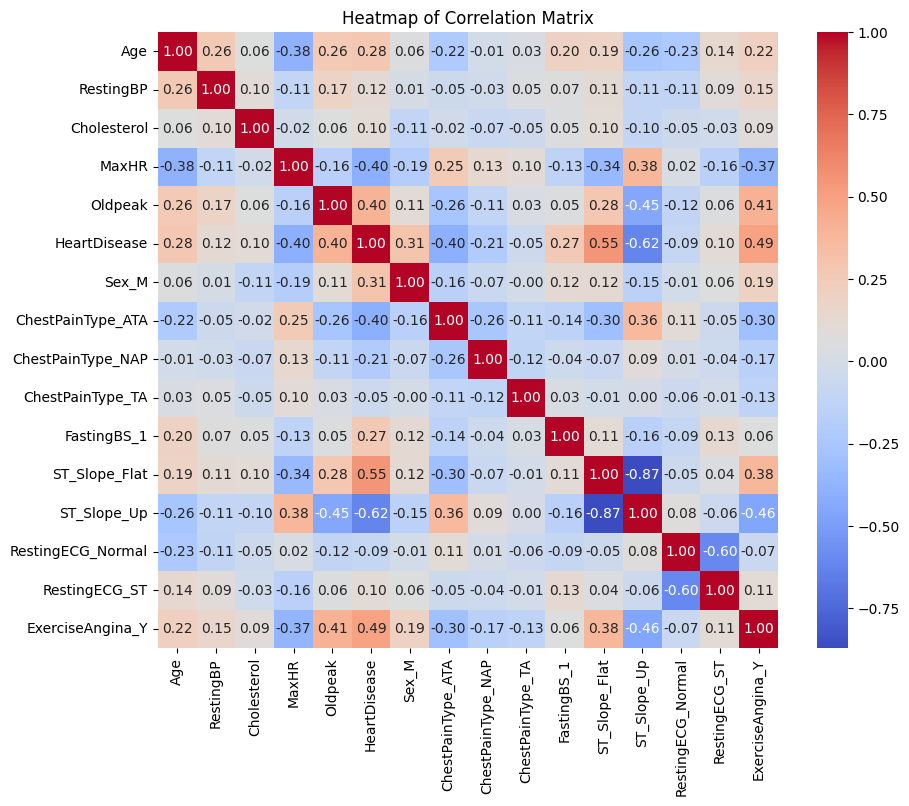

In [294]:
corr_matrix = heart_df.corr()

# Create heatmap with Seaborn
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')

# Add title
plt.title('Heatmap of Correlation Matrix')

# Show the plot
plt.show()

**From our correlation heat map, we can identify the following features to be positively correlated (correlation coefficient greater than 0.3) to HeartDisease**

- **Oldpeak:** We could also select MaxHR or ChestPainType_ATA.

- **Sex_M:** It has a relatively low value for the coefficient, but given what we observed in our EDA, let's also take it into account.

- **ExerciseAngina_Y**

- **ST_Slope_Flat**

- **ST_Slope_Up**

- Surprisingly, Cholesterol is not strongly correlated to HeartDisease. We can consider ignoring the feature for now.

## **Building a Classifier I**

### **We'll split that data set into three parts:**

- Training Set (60%)
- Validation Set (20%)
- Test Set (20%)

In [295]:
X = heart_df.drop("HeartDisease",axis=1)
y=heart_df["HeartDisease"]

X_train, X_val, y_train, y_val=train_test_split(X,y,test_size=0.20,random_state=417)
X_train, X_test, y_train, y_test = train_test_split(X_train, y_train, test_size=0.20*X.shape[0]/X_train.shape[0], random_state = 417)

### **Adding one feature at a time to the model**

In [296]:
features = ["Oldpeak", "Sex_M", "ExerciseAngina_Y", "ST_Slope_Flat", "ST_Slope_Up"]

for feature in features:
    # Initialize the KNeighborsClassifier instance
    kkn_inst_new = KNeighborsClassifier(n_neighbors=5)
    
    # Reshape the feature to be 2-dimensional
    X_train_feature = X_train[[feature]]  # Use double brackets to keep it as a DataFrame (2D)
    X_val_feature = X_val[[feature]]      # Do the same for the validation set
    
    # Train the model on the single feature
    kkn_inst_new.fit(X_train_feature, y_train)
    
    # Evaluate the model on the validation set
    val_accuracy = kkn_inst_new.score(X_val_feature, y_val)
    
    # Print the accuracy of the model
    print(f"Accuracy of model evaluated on validation set with {feature}: {val_accuracy * 100:.2f}%")


Accuracy of model evaluated on validation set with Oldpeak: 70.11%
Accuracy of model evaluated on validation set with Sex_M: 53.80%
Accuracy of model evaluated on validation set with ExerciseAngina_Y: 71.20%
Accuracy of model evaluated on validation set with ST_Slope_Flat: 79.89%
Accuracy of model evaluated on validation set with ST_Slope_Up: 82.07%


### **Adding more than one feature at a time to the model**

In [297]:
from sklearn.neighbors import KNeighborsClassifier

features = ["Oldpeak", "Sex_M", "ExerciseAngina_Y", "ST_Slope_Up", "ST_Slope_Flat"]
feat=[]

for feature in features:

    # Initialize the KNeighborsClassifier instance
    kkn_inst_new = KNeighborsClassifier(n_neighbors=5)
    
    # Use the feature in a list to keep it as a DataFrame (2D)
    feat.append(feature)  # Store the current feature in a list
    
    # Reshape the feature to be 2-dimensional
    X_train_feature = X_train[feat]  # Double brackets keep it 2D
    X_val_feature = X_val[feat]      # Do the same for the validation set
    
    # Train the model on the single feature
    kkn_inst_new.fit(X_train_feature, y_train)
    
    # Evaluate the model on the validation set
    val_accuracy = kkn_inst_new.score(X_val_feature, y_val)
    
    # Print the accuracy of the model
    print(f"Accuracy of model evaluated on validation set with {feat}: {val_accuracy * 100:.2f}%")


Accuracy of model evaluated on validation set with ['Oldpeak']: 70.11%
Accuracy of model evaluated on validation set with ['Oldpeak', 'Sex_M']: 74.46%
Accuracy of model evaluated on validation set with ['Oldpeak', 'Sex_M', 'ExerciseAngina_Y']: 76.63%
Accuracy of model evaluated on validation set with ['Oldpeak', 'Sex_M', 'ExerciseAngina_Y', 'ST_Slope_Up']: 80.43%
Accuracy of model evaluated on validation set with ['Oldpeak', 'Sex_M', 'ExerciseAngina_Y', 'ST_Slope_Up', 'ST_Slope_Flat']: 80.43%


## **Building a Classifier II**

### **Normalising the data**

In [298]:
min_Max_Int=MinMaxScaler()

X_train_scaled = min_Max_Int.fit_transform(X_train[features])
X_val_scaled = min_Max_Int.fit_transform(X_val[features])

In [299]:
# Initialize the KNeighborsClassifier instance
kkn_inst_new = KNeighborsClassifier(n_neighbors=5)

# Train the model on the single feature
kkn_inst_new.fit(X_train_scaled, y_train)

# Evaluate the model on the validation set
val_accuracy = kkn_inst_new.score(X_val_scaled, y_val)
print(f"Accuracy of the normalised model evaluated on validation set with {features}: {val_accuracy * 100:.2f}%")

Accuracy of the normalised model evaluated on validation set with ['Oldpeak', 'Sex_M', 'ExerciseAngina_Y', 'ST_Slope_Up', 'ST_Slope_Flat']: 82.61%


## **Hyperparameter Tuning**

### **We'll split that data set into three parts and scale it (0,1):**

- Training Set (60%)
- Validation Set (20%)
- Test Set (20%)

In [300]:
X = heart_df.drop("HeartDisease",axis=1)
y=heart_df["HeartDisease"]

X_train, X_val, y_train, y_val=train_test_split(X,y,test_size=0.20,random_state=417)
X_train, X_test, y_train, y_test = train_test_split(X_train, y_train, test_size=0.20*X.shape[0]/X_train.shape[0], random_state = 417)

min_Max_Int=MinMaxScaler()
X_train_scaled = min_Max_Int.fit_transform(X_train[features])
X_val_scaled = min_Max_Int.fit_transform(X_val[features])

### **Gridsearch**

**Allows us to search over all the parameters for our classifier in scikit-learn. For example, for the KNeighborsClassifier we can choose to experiment with the following:**

 - **n_neighbors**: 1 - 15
 - **p**: 1 -7
 - **weights**: "uniform" , "distance"
 - **metric**: "minkowski", "manhattan"

In [301]:
grid_dict={"n_neighbors": range(1, 20),"p": range(1, 7),"weights":["uniform","distance"],"metric": ["minkowski", "manhattan"]}

kkn_inst_new = KNeighborsClassifier()
gs_inst= GridSearchCV(kkn_inst_new,grid_dict,scoring="accuracy")
gs_inst.fit(X_train_scaled, y_train)

best_score = gs_inst.best_score_
best_params = gs_inst.best_params_

print(f"Best model's accuracy: {best_score*100:.2f}")
print(f"Best model's parameters: {best_params}")


Best model's accuracy: 84.73
Best model's parameters: {'metric': 'minkowski', 'n_neighbors': 3, 'p': 1, 'weights': 'uniform'}


## **Model Evaluation on Test Set**

**We will now use the Test Set Data**

In [302]:
min_Max_Int=MinMaxScaler()
X_test_scaled = min_Max_Int.fit_transform(X_test[features])

kkn_inst_new = KNeighborsClassifier(n_neighbors=19,metric="minkowski",p=3,weights="uniform")
kkn_inst_new.fit(X_train_scaled, y_train)

# Evaluate the model on the validation set
val_accuracy = kkn_inst_new.score(X_test_scaled, y_test)
print(f"Accuracy of the normalised model evaluated on validation set with {features}: {val_accuracy * 100:.2f}%")

Accuracy of the normalised model evaluated on validation set with ['Oldpeak', 'Sex_M', 'ExerciseAngina_Y', 'ST_Slope_Up', 'ST_Slope_Flat']: 78.26%
